# *EDA - Step 1*

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns
import sklearn

In [69]:
file_path = 'Bike Sales Dashboard.xlsx'   #Specify the path to your Excel file("Bike Sales Dashboard.xlsx")


In [70]:
# Load the Excel file into a DataFrame
A = pd.read_excel(file_path, engine='openpyxl')
A

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No


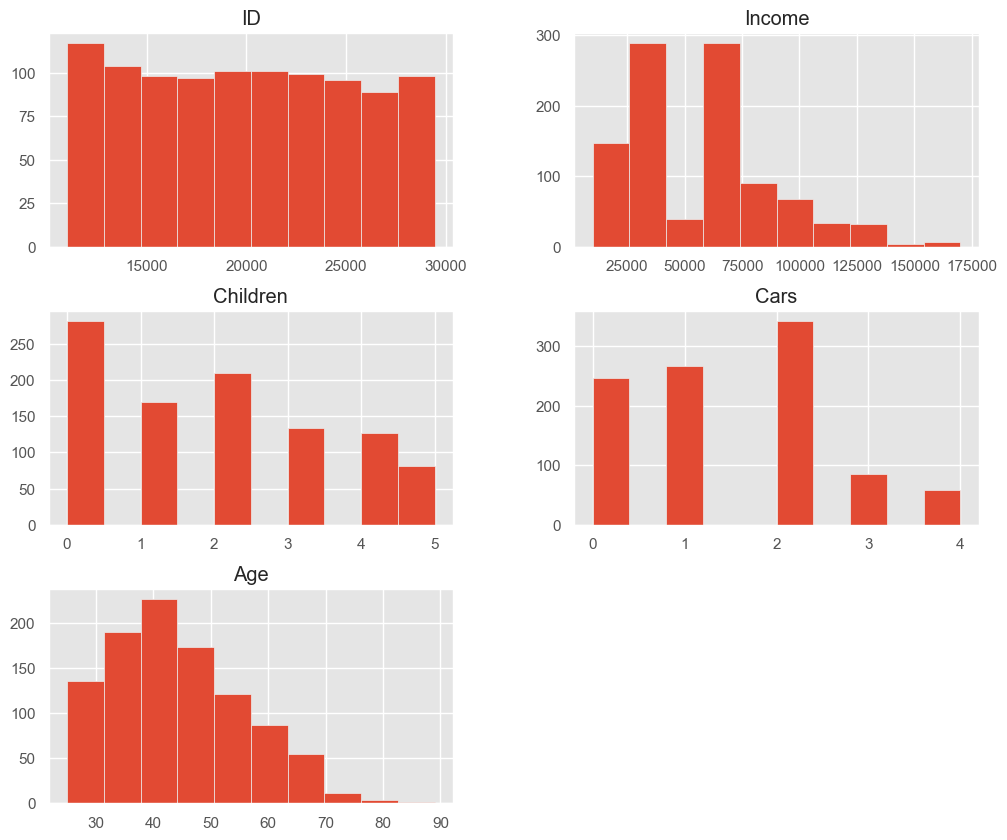

In [71]:
A.hist(figsize=(12, 10))   #Use histograms to visualize the distribution of numerical features.
plt.show()

In [72]:
a= A.corr(numeric_only = True)   #for calculatng correlations
a

,ID,Income,Children,Cars,Age
ID,1.000000,-0.073531,-0.030987,0.032816,-0.049908
Income,-0.073531,1.000000,0.258603,0.428701,0.170077
Children,-0.030987,0.258603,1.000000,0.263360,0.529743
Cars,0.032816,0.428701,0.263360,1.000000,0.188040
Age,-0.049908,0.170077,0.529743,0.188040,1.000000


<Axes: >

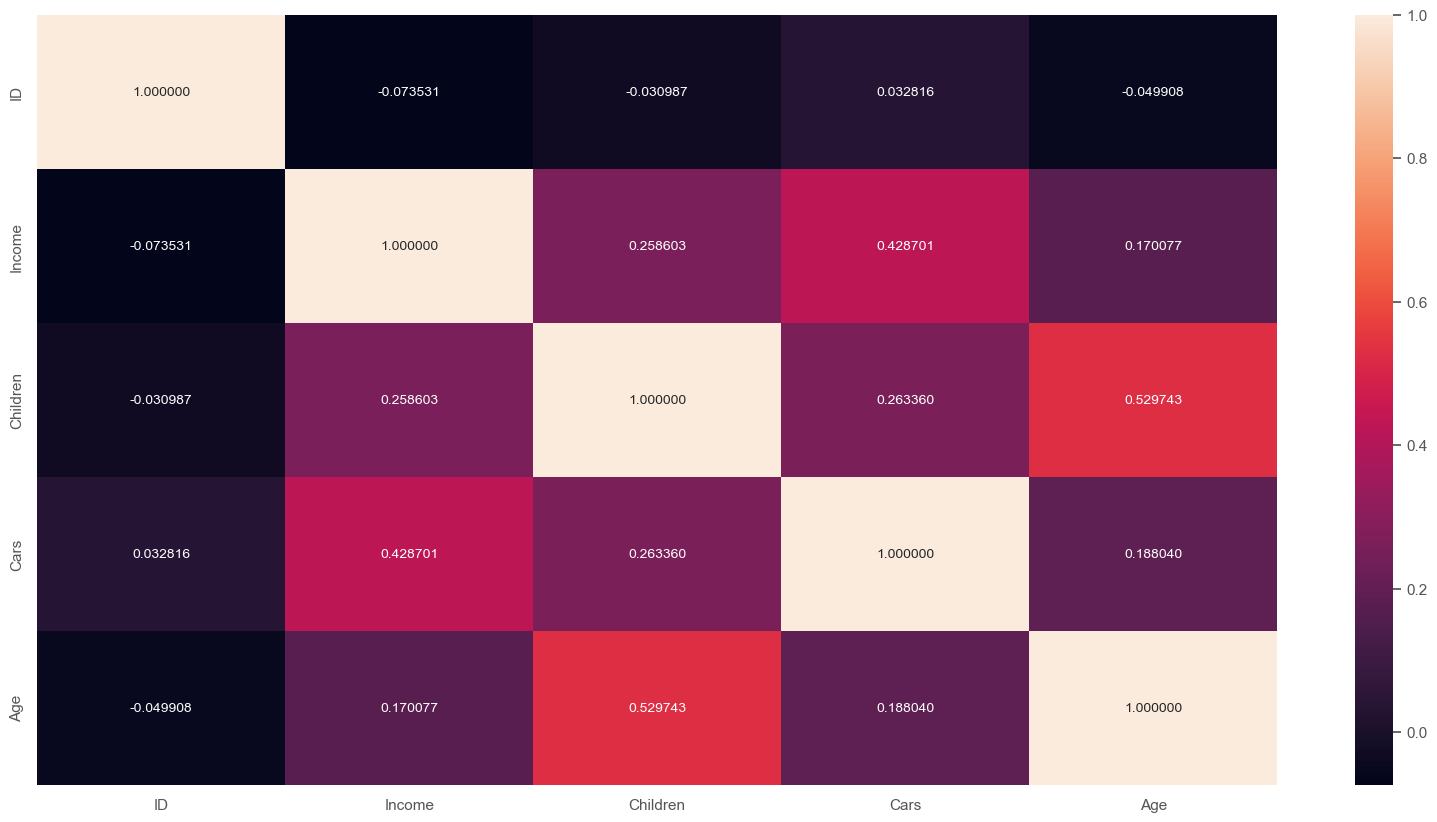

In [73]:
plt.figure(figsize =(20,10))
sns.heatmap(a,fmt = '2f', annot = True)

<Axes: ylabel='Income'>

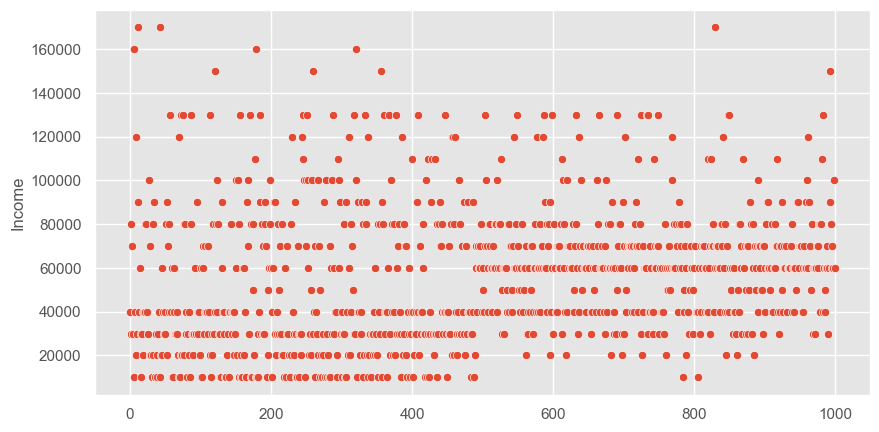

In [74]:
plt.figure(figsize = (10,5))
sns.scatterplot(A['Income'])

In [75]:
A.describe()   # to describe the numerical features of the data

,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56360.000000,1.898000,1.442000,44.163000
std,5347.333948,31085.635215,1.628572,1.125123,11.364488
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [76]:
A.isnull().sum() # Check for missing values


ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

<Axes: >

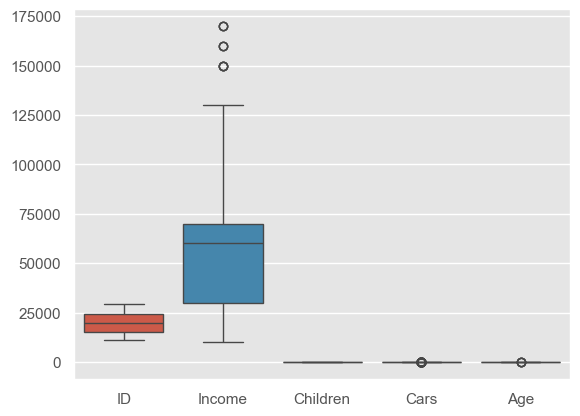

In [77]:
sns.boxplot(A)   # using boxplot to visualize the distribution of numerical features.

<Axes: ylabel='Income'>

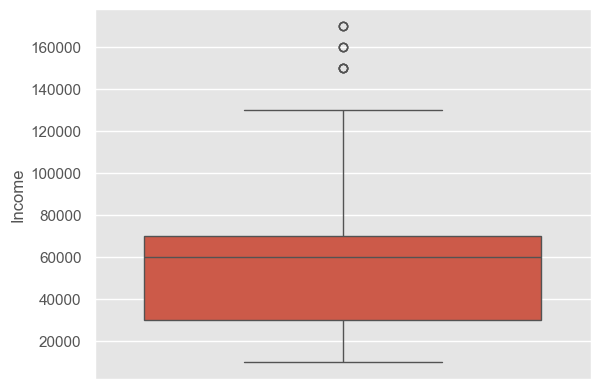

In [78]:
sns.boxplot(data=A, y = 'Income') # using boxplot to visualize the distribution of numerical features.

<Axes: ylabel='Cars'>

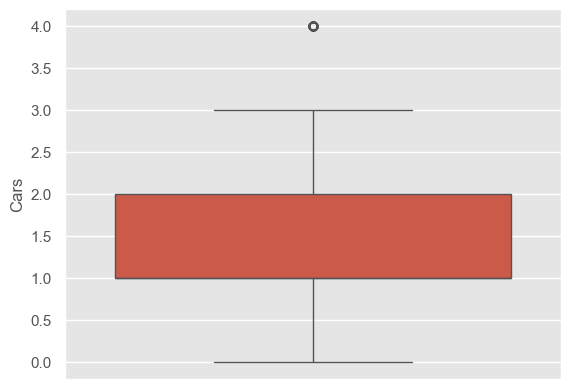

In [79]:
sns.boxplot(data=A, y = 'Cars')

<Axes: ylabel='Age'>

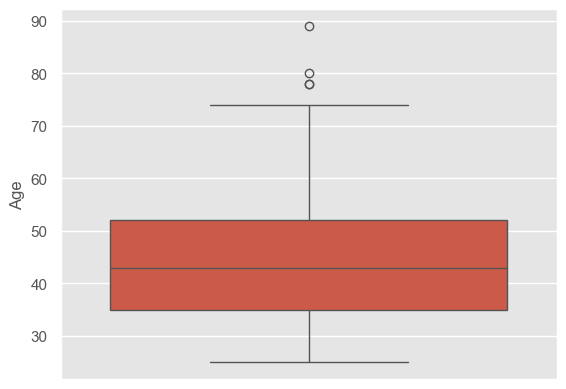

In [80]:
sns.boxplot(data=A, y = 'Age')

<Axes: ylabel='Children'>

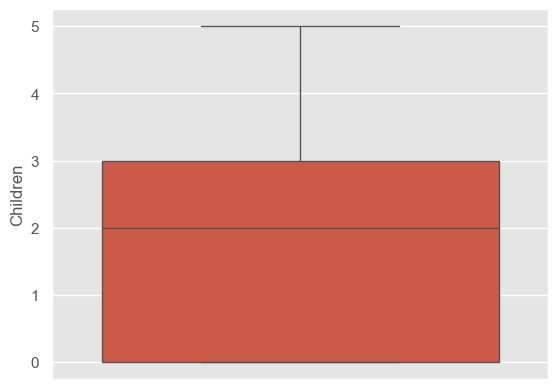

In [81]:
sns.boxplot(data=A, y = 'Children')

In [82]:
n = A[['Age', 'Cars','Income']]   #correcting outliners 

In [83]:
for c in n.columns:
    percentile25=n[c].quantile(0.25)
    percentile75=n[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    
    
    A=A[A[c]<upper_limit]
    A=A[A[c]>lower_limit]
    
    n=n[n[c]<upper_limit]
    n=n[n[c]>lower_limit]
    
A,n

(        ID Martial Status  Gender  Income  Children        Education  \
 0    12496        Married  Female   40000         1        Bachelors   
 1    24107        Married    Male   30000         3  Partial College   
 2    14177        Married    Male   80000         5  Partial College   
 3    24381         Single    Male   70000         0        Bachelors   
 4    25597         Single    Male   30000         0        Bachelors   
 ..     ...            ...     ...     ...       ...              ...   
 995  23731        Married    Male   60000         2      High School   
 996  28672         Single    Male   70000         4  Graduate Degree   
 997  11809        Married    Male   60000         2        Bachelors   
 998  19664         Single    Male  100000         3        Bachelors   
 999  12121         Single    Male   60000         3      High School   
 
          Occupation Home Owner  Cars    Commute Distance         Region  Age  \
 0    Skilled Manual        Yes     0    

<Axes: ylabel='Age'>

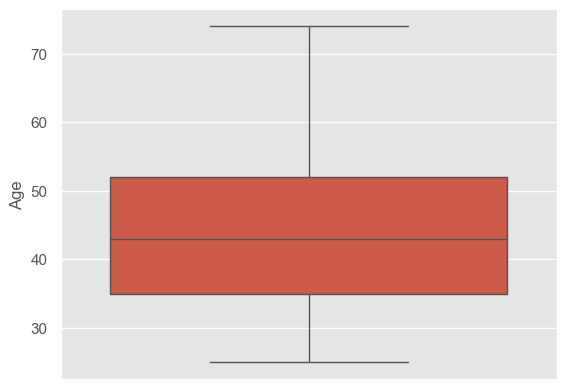

In [84]:
sns.boxplot(data=A, y = 'Age')

<Axes: ylabel='Income'>

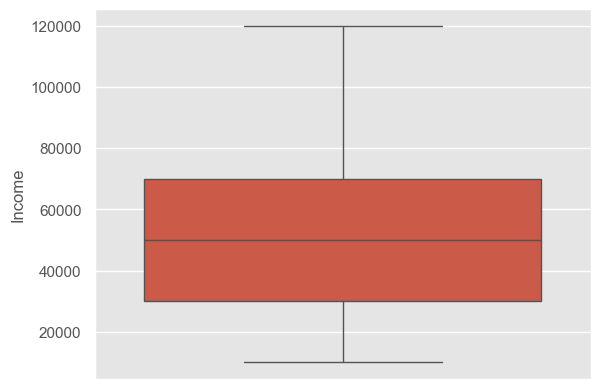

In [85]:
sns.boxplot(data=A, y = 'Income')

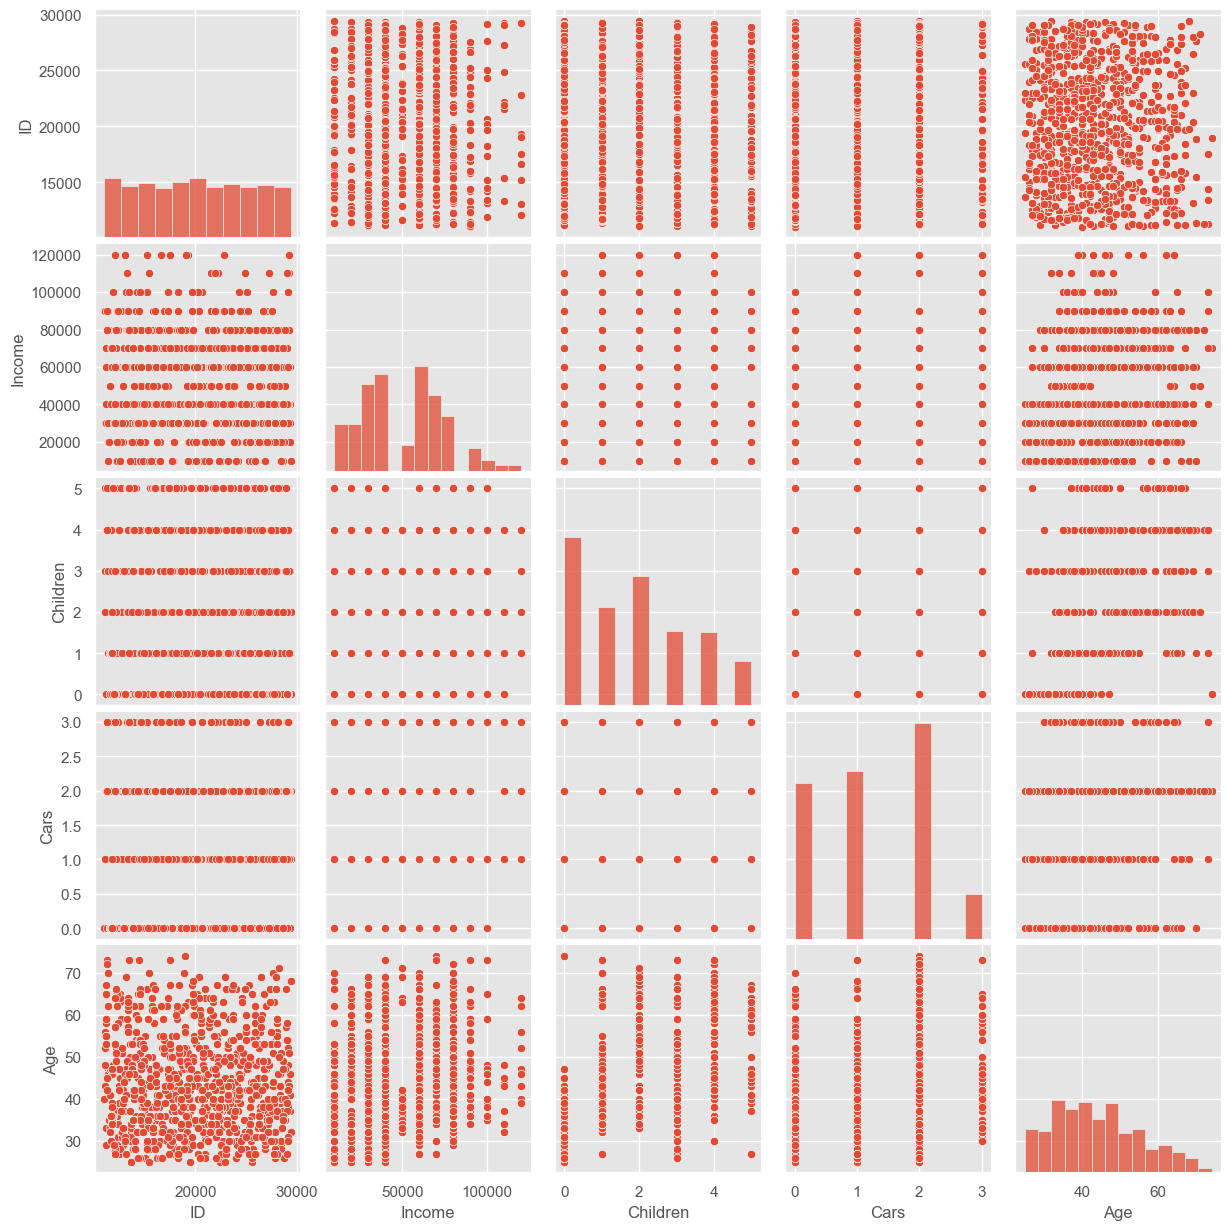

In [86]:
sns.pairplot(A)

In [87]:
sns.set(style="whitegrid")  # Set the style for the plots


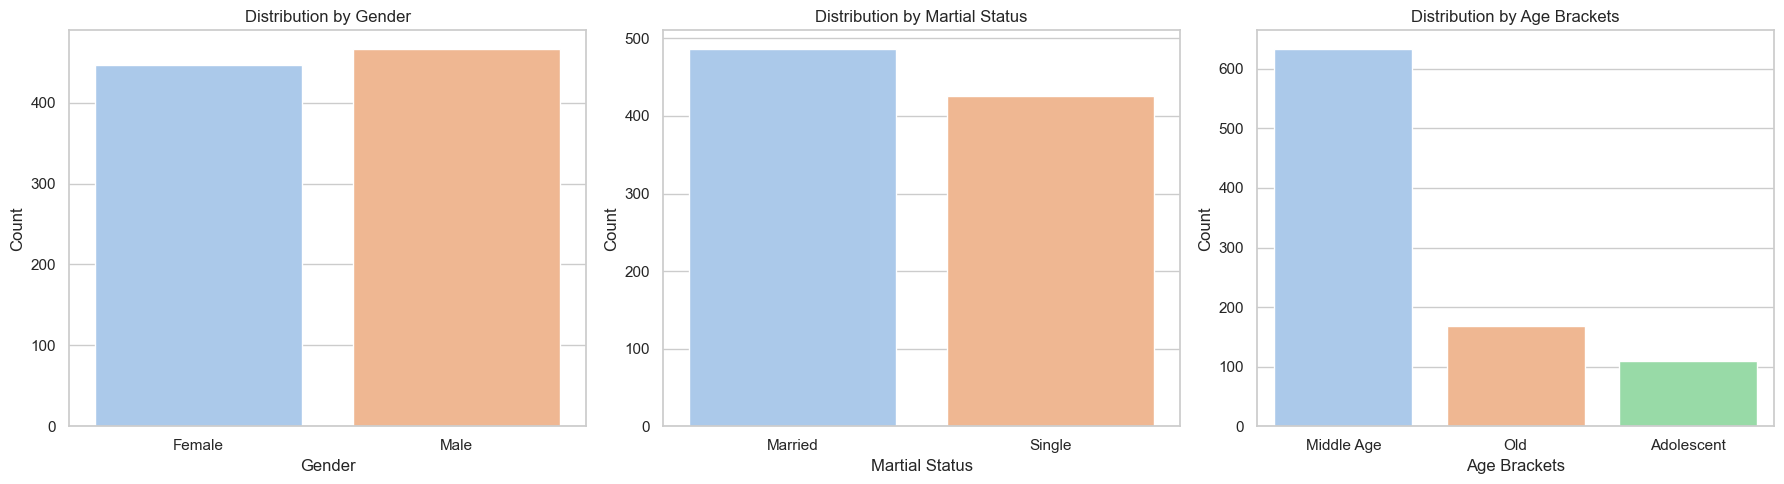

In [88]:
# 1. Demographic Distribution: Gender, Martial Status, and Age Brackets
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='Gender', data= A, hue = 'Gender', palette='pastel', ax=axes[0], legend='auto')
axes[0].set_title('Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(x='Martial Status', data = A,hue='Martial Status', palette='pastel', ax=axes[1], legend ='auto')
axes[1].set_title('Distribution by Martial Status')
axes[1].set_xlabel('Martial Status')
axes[1].set_ylabel('Count')

sns.countplot(x='Age Brackets', data=A,  hue='Age Brackets',palette='pastel', ax=axes[2], legend='auto')
axes[2].set_title('Distribution by Age Brackets')
axes[2].set_xlabel('Age Brackets')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()



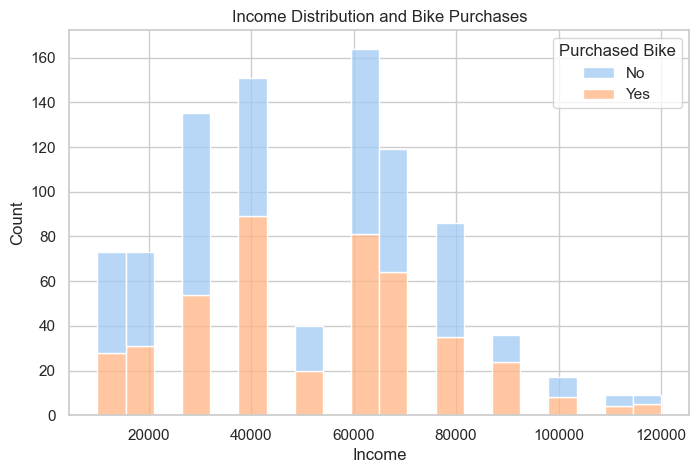

In [89]:
# Income Analysis: Income distribution and relationship with bike purchases
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(A, x='Income', hue='Purchased Bike', multiple='stack', palette='pastel', bins=20)
ax.set_title('Income Distribution and Bike Purchases')
ax.set_xlabel('Income')
ax.set_ylabel('Count')
plt.show()


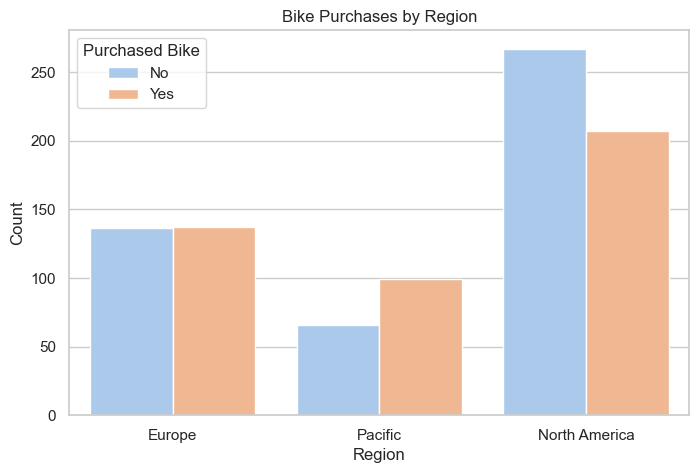

In [90]:
# 3. Geographical Insights: Bike purchases by region
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='Region', hue='Purchased Bike', data=A, palette='pastel')
ax.set_title('Bike Purchases by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Count')
plt.show()


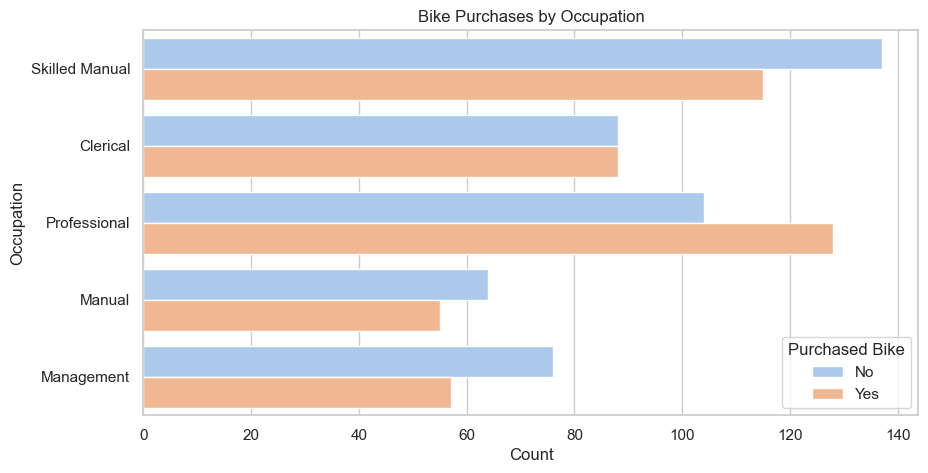

In [91]:
# 4. Purchase Patterns: Relationship between Occupation and bike purchases
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y='Occupation', hue='Purchased Bike', data=A, palette='pastel')
ax.set_title('Bike Purchases by Occupation')
ax.set_xlabel('Count')
ax.set_ylabel('Occupation')
plt.show()


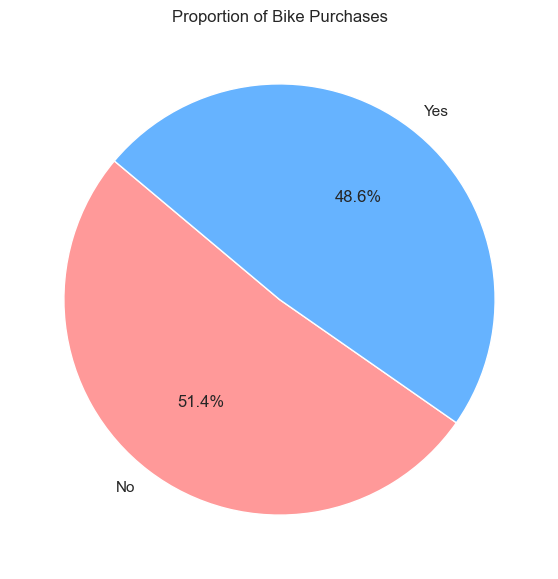

In [92]:
# Proportion of Bike Purchases
plt.figure(figsize=(7, 7))
bike_purchase_counts = A['Purchased Bike'].value_counts()
plt.pie(bike_purchase_counts, labels=bike_purchase_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Bike Purchases')
plt.show()


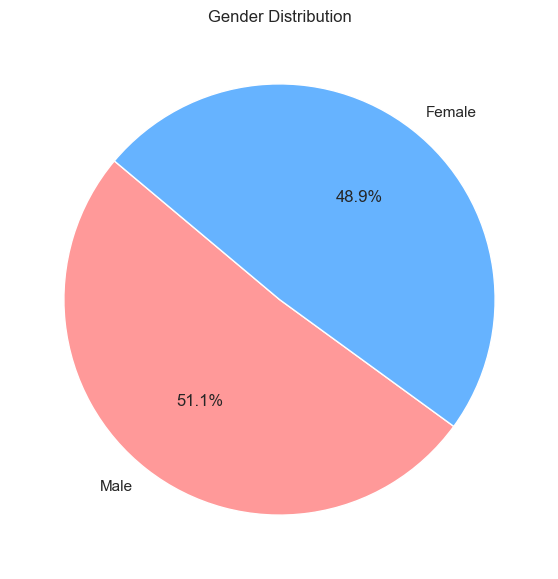

In [93]:
# Distribution by Gender
plt.figure(figsize=(7, 7))
gender_counts = A['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

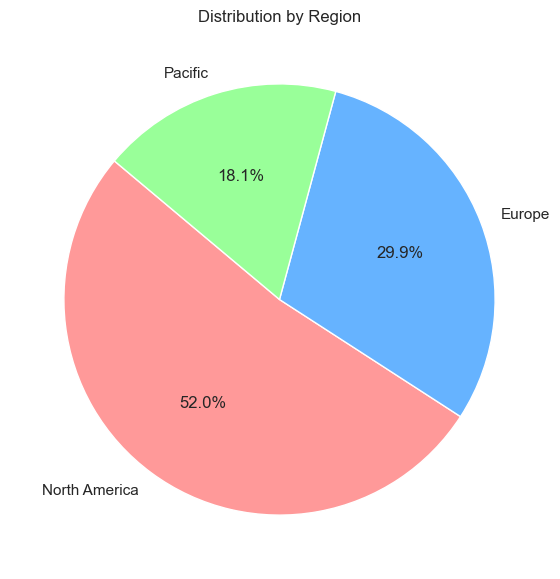

In [94]:
plt.figure(figsize=(7, 7))
region_counts = A['Region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution by Region')
plt.show()

C:\Users\thesl\AppData\Local\Temp\ipykernel_5572\3638360463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(A['Income'], shade=True, color="r")


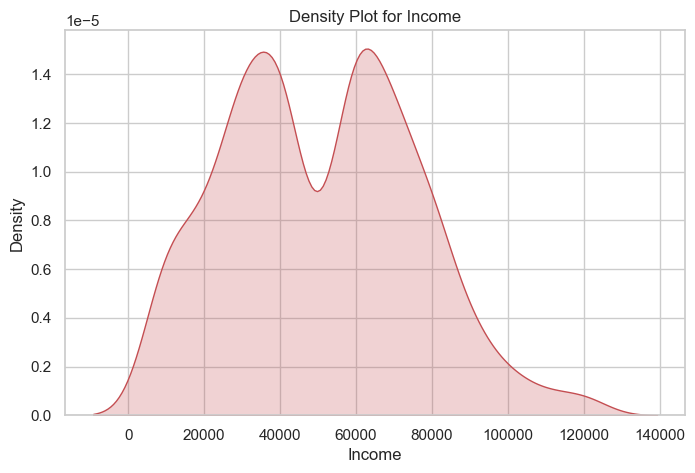

In [95]:
# Density plot for Income
plt.figure(figsize=(8, 5))
sns.kdeplot(A['Income'], shade=True, color="r")
plt.title('Density Plot for Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()


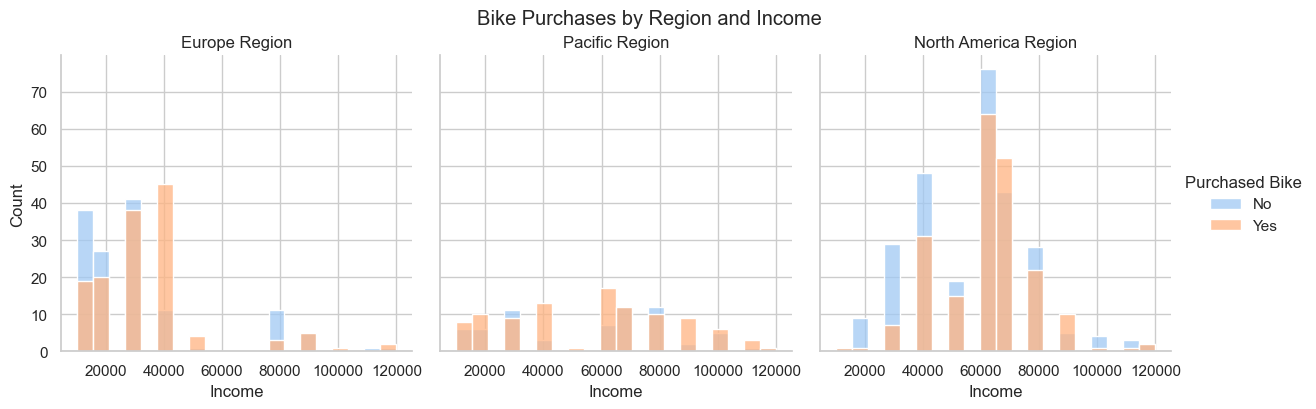

In [96]:
# Facet Grid to show bike purchases by region and marital status
g = sns.FacetGrid(A, col='Region', hue='Purchased Bike', palette='pastel', height=4, aspect=1)
g.map(sns.histplot, 'Income', kde=False, bins=20)
g.add_legend()
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name} Region')
g.fig.suptitle('Bike Purchases by Region and Income', y=1.02)
plt.show()


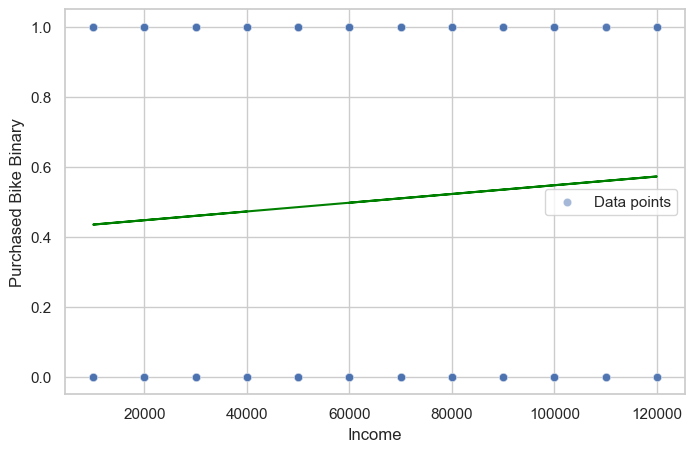

In [97]:

# Encode 'Purchased Bike' as a binary variable
A['Purchased Bike Binary'] = A['Purchased Bike'].map({'Yes': 1, 'No': 0})

# Define the variables for the regression
Income = A['Income']
Purchased_Bike_Binary = A['Purchased Bike Binary']

# Fit a linear regression line
coeffs = np.polyfit(Income, Purchased_Bike_Binary, 1)
regression_line = np.poly1d(coeffs)

# Plot the data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Income, y=Purchased_Bike_Binary, alpha=0.5, label='Data points')

# Plot the regression line
plt.plot(Income, regression_line(Income), color='green', label='Regression line')

# *DATA PREPROCESSING - Step 2*

In [98]:
A

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike,Purchased Bike Binary
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Middle Age,Yes,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Middle Age,Yes,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Middle Age,Yes,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,Middle Age,No,0


In [99]:
numerical_values = ['ID', 'Income', 'Children', 'Cars', 'Age']
categorical_values = A.drop(columns=numerical_values).columns.tolist()

In [100]:
categorical_values

['Martial Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Age Brackets',
 'Purchased Bike',
 'Purchased Bike Binary']

In [101]:
numerical_values

['ID', 'Income', 'Children', 'Cars', 'Age']

In [102]:
categorical = A[categorical_values]

In [103]:
categorical

,Martial Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Age Brackets,Purchased Bike,Purchased Bike Binary
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,Middle Age,No,0
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,Middle Age,No,0
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,Old,No,0
3,Single,Male,Bachelors,Professional,Yes,5-10 Miles,Pacific,Middle Age,Yes,1
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Middle Age,Yes,1
...,...,...,...,...,...,...,...,...,...,...
995,Married,Male,High School,Professional,Yes,2-5 Miles,North America,Middle Age,Yes,1
996,Single,Male,Graduate Degree,Professional,Yes,2-5 Miles,North America,Middle Age,Yes,1
997,Married,Male,Bachelors,Skilled Manual,Yes,0-1 Miles,North America,Middle Age,Yes,1
998,Single,Male,Bachelors,Management,No,1-2 Miles,North America,Middle Age,No,0


#### encoding the categorical values

In [104]:
p = pd.get_dummies(categorical, columns=categorical_values, drop_first=True)
p = p.astype(int)
p

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_1-2 Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
996,1,1,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
997,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
998,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0


#### encoding the numerical values

In [105]:
numerical_values

['ID', 'Income', 'Children', 'Cars', 'Age']

In [106]:
numerical_df = A[numerical_values]

In [107]:
numerical_df

,ID,Income,Children,Cars,Age
0,12496,40000,1,0,42
1,24107,30000,3,1,43
2,14177,80000,5,2,60
3,24381,70000,0,1,41
4,25597,30000,0,0,36
...,...,...,...,...,...
995,23731,60000,2,2,54
996,28672,70000,4,0,35
997,11809,60000,2,0,38
998,19664,100000,3,3,38


##### using minmax scalar

In [108]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [109]:
A_num_mm = mm.fit_transform(numerical_df)

In [110]:
q = A_num_mm 

In [111]:
q

array([[0.0810972 , 0.27272727, 0.2       , 0.        , 0.34693878],
       [0.71052204, 0.18181818, 0.6       , 0.33333333, 0.36734694],
       [0.17222313, 0.63636364, 1.        , 0.66666667, 0.71428571],
       ...,
       [0.04385537, 0.45454545, 0.4       , 0.        , 0.26530612],
       [0.46966987, 0.81818182, 0.6       , 1.        , 0.26530612],
       [0.06076869, 0.45454545, 0.6       , 0.66666667, 0.57142857]])

In [112]:
q_df = pd.DataFrame(q, columns = numerical_values)

In [113]:
q_df

,ID,Income,Children,Cars,Age
0,0.081097,0.272727,0.2,0.000000,0.346939
1,0.710522,0.181818,0.6,0.333333,0.367347
2,0.172223,0.636364,1.0,0.666667,0.714286
3,0.725375,0.545455,0.0,0.333333,0.326531
4,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...
907,0.690139,0.454545,0.4,0.666667,0.591837
908,0.957988,0.545455,0.8,0.000000,0.204082
909,0.043855,0.454545,0.4,0.000000,0.265306
910,0.469670,0.818182,0.6,1.000000,0.265306


##### using std scalar 

In [114]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [115]:
A_num_ss = ss.fit_transform(numerical_df)

In [116]:
r = A_num_ss

In [117]:
r

array([[-1.42515219, -0.43283615, -0.53326276, -1.34169228, -0.16340404],
       [ 0.75278949, -0.83318765,  0.70738937, -0.27395811, -0.07490969],
       [-1.1098374 ,  1.16856982,  1.94804151,  0.79377606,  1.42949423],
       ...,
       [-1.55401671,  0.36786683,  0.08706331, -1.34169228, -0.51738143],
       [-0.08060943,  1.96927281,  0.70738937,  1.86151023, -0.51738143],
       [-1.49549308,  0.36786683,  0.70738937,  0.79377606,  0.81003379]])

In [118]:
r_df = pd.DataFrame(r, columns = numerical_values)

In [119]:
r_df

,ID,Income,Children,Cars,Age
0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,-1.109837,1.168570,1.948042,0.793776,1.429494
3,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...
907,0.682261,0.367867,0.087063,0.793776,0.898528
908,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,-0.080609,1.969273,0.707389,1.861510,-0.517381


#### concate minmax scaler as concate_1 

In [120]:
p

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_1-2 Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
996,1,1,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
997,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
998,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [121]:
q_df

,ID,Income,Children,Cars,Age
0,0.081097,0.272727,0.2,0.000000,0.346939
1,0.710522,0.181818,0.6,0.333333,0.367347
2,0.172223,0.636364,1.0,0.666667,0.714286
3,0.725375,0.545455,0.0,0.333333,0.326531
4,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...
907,0.690139,0.454545,0.4,0.666667,0.591837
908,0.957988,0.545455,0.8,0.000000,0.204082
909,0.043855,0.454545,0.4,0.000000,0.265306
910,0.469670,0.818182,0.6,1.000000,0.265306


In [122]:
p.columns

Index(['Martial Status_Single', 'Gender_Male', 'Education_Graduate Degree',
       'Education_High School', 'Education_Partial College',
       'Education_Partial High School', 'Occupation_Management',
       'Occupation_Manual', 'Occupation_Professional',
       'Occupation_Skilled Manual', 'Home Owner_Yes',
       'Commute Distance_1-2 Miles', 'Commute Distance_2-5 Miles',
       'Commute Distance_5-10 Miles', 'Commute Distance_More than 10 Miles',
       'Region_North America', 'Region_Pacific', 'Age Brackets_Middle Age',
       'Age Brackets_Old', 'Purchased Bike_Yes', 'Purchased Bike Binary_1'],
      dtype='object')

In [123]:
q_df.columns

Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')

In [124]:
p.reset_index(drop=True, inplace=True)
q_df.reset_index(drop=True, inplace=True)

In [125]:
p,q_df

(     Martial Status_Single  Gender_Male  Education_Graduate Degree  \
 0                        0            0                          0   
 1                        0            1                          0   
 2                        0            1                          0   
 3                        1            1                          0   
 4                        1            1                          0   
 ..                     ...          ...                        ...   
 907                      0            1                          0   
 908                      1            1                          1   
 909                      0            1                          0   
 910                      1            1                          0   
 911                      1            1                          0   
 
      Education_High School  Education_Partial College  \
 0                        0                          0   
 1                        0   

In [126]:
concate_1 = pd.concat([p,q_df],axis = 1, join = 'outer')

In [127]:
concate_1

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.081097,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.710522,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0.172223,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,1,1,0,1,1,0.725375,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0.690139,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0.957988,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0.043855,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.469670,0.818182,0.6,1.000000,0.265306


#### concate std scalar as concate_2

In [128]:
p

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_1-2 Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,1,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
909,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
910,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [129]:
r_df

,ID,Income,Children,Cars,Age
0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,-1.109837,1.168570,1.948042,0.793776,1.429494
3,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...
907,0.682261,0.367867,0.087063,0.793776,0.898528
908,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,-0.080609,1.969273,0.707389,1.861510,-0.517381


In [130]:
concate_2 = pd.concat([p,r_df],axis = 1)

In [131]:
concate_2

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,-1.109837,1.168570,1.948042,0.793776,1.429494
3,1,1,0,0,0,0,0,0,1,0,...,1,1,0,1,1,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0.682261,0.367867,0.087063,0.793776,0.898528
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,-0.080609,1.969273,0.707389,1.861510,-0.517381


### splitting 

#### minmax one 

In [132]:
concate_1

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0.081097,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.710522,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0.172223,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,1,1,0,1,1,0.725375,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0.791294,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0.690139,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0.957988,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0.043855,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0.469670,0.818182,0.6,1.000000,0.265306


In [133]:
minmax_dataset = concate_1.drop(columns = 'ID')

In [134]:
minmax_dataset

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,0,1,1,0,1,1,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,1,1,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,1,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0.818182,0.6,1.000000,0.265306


In [135]:
x1 = minmax_dataset.drop(columns = 'Purchased Bike_Yes')

In [136]:
x1

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Commute Distance_More than 10 Miles,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike Binary_1,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0.818182,0.6,1.000000,0.265306


In [137]:
y1 = minmax_dataset['Purchased Bike_Yes']

In [138]:
y1

0      0
1      0
2      0
3      1
4      1
      ..
907    1
908    1
909    1
910    0
911    1
Name: Purchased Bike_Yes, Length: 912, dtype: int32

 ##### splitting the data set in training and testing 

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.45,random_state=50)

### std scalar one

In [141]:
concate_2

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1,ID,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,-1.425152,-0.432836,-0.533263,-1.341692,-0.163404
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0.752789,-0.833188,0.707389,-0.273958,-0.074910
2,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,-1.109837,1.168570,1.948042,0.793776,1.429494
3,1,1,0,0,0,0,0,0,1,0,...,1,1,0,1,1,0.804185,0.768218,-1.153589,-0.273958,-0.251898
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1.032277,-0.833188,-1.153589,-1.341692,-0.694370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,1,0.682261,0.367867,0.087063,0.793776,0.898528
908,1,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1.609073,0.768218,1.327715,-1.341692,-0.782864
909,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,-1.554017,0.367867,0.087063,-1.341692,-0.517381
910,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,-0.080609,1.969273,0.707389,1.861510,-0.517381


In [142]:
stdscalar_dataset = concate_1.drop(columns = 'ID')

In [143]:
stdscalar_dataset

,Martial Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,Region_North America,Region_Pacific,Age Brackets_Middle Age,Age Brackets_Old,Purchased Bike_Yes,Purchased Bike Binary_1,Income,Children,Cars,Age
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.272727,0.2,0.000000,0.346939
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.181818,0.6,0.333333,0.367347
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0.636364,1.0,0.666667,0.714286
3,1,1,0,0,0,0,0,0,1,0,...,0,1,1,0,1,1,0.545455,0.0,0.333333,0.326531
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0.181818,0.0,0.000000,0.224490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,1,1,0.454545,0.4,0.666667,0.591837
908,1,1,1,0,0,0,0,0,1,0,...,1,0,1,0,1,1,0.545455,0.8,0.000000,0.204082
909,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0.454545,0.4,0.000000,0.265306
910,1,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0.818182,0.6,1.000000,0.265306


In [144]:
x2 = stdscalar_dataset.drop(columns = 'Purchased Bike_Yes')

In [145]:
y2 = stdscalar_dataset['Purchased Bike_Yes']

##### splitting the std data set 

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.6,random_state=18)

# *LOGISTIC REGRESSION - Step 3*

### minmax one

In [166]:
x1_train,x1_test

(     Martial Status_Single  Gender_Male  Education_Graduate Degree  \
 791                      0            1                          0   
 460                      0            0                          0   
 387                      1            0                          0   
 892                      0            0                          0   
 806                      1            0                          0   
 ..                     ...          ...                        ...   
 289                      0            0                          0   
 109                      1            0                          0   
 907                      0            1                          0   
 480                      1            0                          0   
 688                      0            0                          0   
 
      Education_High School  Education_Partial College  \
 791                      0                          0   
 460                      1   

In [169]:
y1_train,y1_test


(791    0
 460    0
 387    1
 892    0
 806    0
       ..
 289    1
 109    1
 907    1
 480    1
 688    0
 Name: Purchased Bike_Yes, Length: 501, dtype: int32,
 330    1
 104    1
 127    0
 765    0
 686    1
       ..
 612    0
 648    0
 755    1
 208    0
 838    1
 Name: Purchased Bike_Yes, Length: 411, dtype: int32)

In [170]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [171]:
lor.fit(x1_train, y1_train)



LogisticRegression()

In [172]:
y1_pred = lor.predict(x1_test)

#### evaluation of minmax one

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
sklearn.metrics.accuracy_score(y1_test, y1_pred)


1.0

In [175]:
from sklearn.metrics import roc_auc_score

In [176]:
sklearn.metrics.roc_auc_score(y1_test, y1_pred)

1.0

### std scaler one

In [177]:
x2_train,x2_test

(     Martial Status_Single  Gender_Male  Education_Graduate Degree  \
 365                      0            0                          1   
 570                      1            0                          0   
 763                      0            0                          0   
 516                      1            0                          0   
 735                      0            0                          0   
 ..                     ...          ...                        ...   
 702                      0            0                          0   
 837                      0            1                          0   
 120                      1            0                          0   
 275                      0            1                          0   
 298                      1            1                          0   
 
      Education_High School  Education_Partial College  \
 365                      0                          0   
 570                      0   

In [158]:
y2_train,y2_test

(365    1
 570    1
 763    1
 516    1
 735    0
       ..
 702    0
 837    0
 120    1
 275    0
 298    0
 Name: Purchased Bike_Yes, Length: 364, dtype: int32,
 568    0
 177    1
 80     1
 54     0
 628    0
       ..
 748    1
 805    0
 480    1
 870    1
 355    0
 Name: Purchased Bike_Yes, Length: 548, dtype: int32)

In [159]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [160]:
lor.fit(x2_train, y2_train)

LogisticRegression()

In [161]:
y2_pred = lor.predict(x2_test)

#### evaluation of std scalar one

In [162]:
from sklearn.metrics import accuracy_score

In [163]:
sklearn.metrics.accuracy_score(y2_test, y2_pred)

1.0

In [164]:
from sklearn.metrics import roc_auc_score

In [165]:
sklearn.metrics.roc_auc_score(y2_test, y2_pred)

1.0